# Candidate Test 2022 Analysis Part 2

This exercise focuses on the candidate tests from two television networks: DR and TV2. Data from both tests have been given on a scale of five responses (-2, -1, 0, 1, 2). Consider normalizing the data or performing similar scaling transformations as needed.

---

There are 6 datasets included in this exercise:

- `alldata.xlsx`: Contains responses from both TV stations.
- `drdata.xlsx`: Contains responses from DR.
- `drq.xlsx`: Contains questions from DR.
- `tv2data.xlsx`: Contains responses from TV2.
- `tv2q.xlsx`: Contains questions from TV2.
- `electeddata.xlsx`: Contains responses from both TV stations for candidates who were elected to the parliament. Note that 9 members are missing; 7 of them didn't take any of the tests. Additionally, some notable figures like Mette F. and Lars Løkke did not participate in any of the tests.

---

It's entirely up to you how you approach this data, but at a *minimum*, your analysis should include:

- An analysis/description of which questions are most crucial concerning their placement on the axes.
- Average positions of parties concerning each question, preferably with accompanying plots of each (or selected) question.
- A clustering analysis where you attempt various cluster numbers, which would correspond to different parties. Discuss whether there is room for more clusters/parties or if a reduction is needed. Make sure you cover: **K-Means, Hierarchical clustering, and DBSCAN.**
- An overview of the political landscape of the elected candidates, highlighting which members agree or disagree the most and which parties or party members have significant disagreements.
- Feel free to explore further and remember that preprocessing, methodology, and evaluation metrics are not mentioned explicitly, but are implicitly assumed.

---

The following parties are represented:

| Party letter | Party name | Party name (English) | Political position |
| :-: | :-: | :-: | :-: |
| A | Socialdemokratiet | Social Democrats | Centre-left |
| V | Venstre | Danish Liberal Party | Centre-right |
| M | Moderaterne | Moderates | Centre-right |
| F | Socialistisk Folkeparti | Socialist People's Party | Left-wing |
| D | Danmarksdemokraterne | Denmark Democrats | Right-wing |
| I | Liberal Alliance | Liberal Alliance | Right-wing |
| C | Konservative | Conservative People's Party | Right-wing |
| Æ | Enhedslisten | Red-Green Alliance | Far-left |
| B | Radikale Venstre | Social Liberal Party | Centre-left |
| D | Nye Borgerlige | New Right | Far-right |
| Z | Alternativet | The Alternative | Centre-left |
| O | Dansk Folkeparti | Danish People's Party | Far-right |
| G | Frie Grønne | Free Greens | Centre-left |
| K | Kristendemokraterne | Christian Democrats | Centre-right |

Below you can see the results and the colors chosen to represent the parties. Use these colors in your analysis above.

![Alt text](image-1.png)


Others have undertaken similar analyses. You can draw inspiration from the following (use Google tranlsate if your Danish is rusty):

- [Analysis of where individual candidates stand relative to each other and their parties](https://v2022.dumdata.dk/)
- [Candidate Test 2022 – A deep dive into the data](https://kwedel.github.io/kandidattest2022/)
- [The Political Landscape 2019](https://kwedel.github.io/kandidattest2019/)



### Preprocessing
We choose to use the preprocessing from the first part of this assignment as it is very similar.

In [1]:
# Import statements
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram
import seaborn as sns
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Defining dataframe
data = pd.read_excel('alldata.xlsx')
data.head()

,530,531,533,534,535,537,538,540,541,543,...,9a,9b,10a,10b,11a,11b,12a,12b,storkreds,alder
0,-1,-2,1,-2,2,1,-2,1,1,2,...,2,0,1,-2,-2,1,1,1,Københavns Storkreds,78
1,2,2,-1,-2,-1,-2,1,-2,2,-2,...,-2,0,-1,2,1,-2,0,0,Fyns Storkreds,64
2,2,1,-2,-2,1,-2,1,-1,1,-1,...,-1,-2,0,2,0,-1,1,-2,Bornholms Storkreds,37
3,2,1,-2,-1,1,1,1,1,1,-2,...,-2,2,2,2,2,-1,2,0,Nordjyllands Storkreds,28
4,1,1,-2,2,-2,1,-2,1,2,-2,...,-2,0,-1,0,-2,0,2,-2,Københavns Storkreds,58


In [3]:
data.drop(['alder', 'storkreds'], axis=1)

,530,531,533,534,535,537,538,540,541,543,...,8a,8b,9a,9b,10a,10b,11a,11b,12a,12b
0,-1,-2,1,-2,2,1,-2,1,1,2,...,1,0,2,0,1,-2,-2,1,1,1
1,2,2,-1,-2,-1,-2,1,-2,2,-2,...,0,0,-2,0,-1,2,1,-2,0,0
2,2,1,-2,-2,1,-2,1,-1,1,-1,...,1,1,-1,-2,0,2,0,-1,1,-2
3,2,1,-2,-1,1,1,1,1,1,-2,...,2,2,-2,2,2,2,2,-1,2,0
4,1,1,-2,2,-2,1,-2,1,2,-2,...,1,0,-2,0,-1,0,-2,0,2,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,1,1,1,-2,2,-1,1,-2,1,1,...,2,1,1,2,-1,2,1,-2,0,0
863,1,-2,-2,-2,1,-2,-1,-2,-2,-2,...,1,0,-1,0,-1,2,2,-2,0,0
864,1,1,1,-2,2,-1,1,-1,-1,1,...,1,0,-1,0,-1,2,2,-2,0,1
865,1,-1,1,-2,1,-1,-1,-1,-1,1,...,0,0,0,0,0,2,1,-2,1,0


In [4]:
partier = data.parti.unique()
partier

array(['Moderaterne', 'Socialistisk Folkeparti', 'Alternativet',
       'Løsgænger', 'Enhedslisten', 'Danmarksdemokraterne', 'Venstre',
       'Frie Grønne, Danmarks Nye Venstrefløjsparti', 'Dansk Folkeparti',
       'Kristendemokraterne', 'Liberal Alliance', 'Nye Borgerlige',
       'Det Konservative Folkeparti', 'Radikale Venstre',
       'Socialdemokratiet'], dtype=object)

In [5]:
symboler = ['M', 'F', 'Å', 'L', 'Ø', 'Æ', 'V', 'Q', 'O', 'K', 'I', 'D', 'C', 'B', 'A']
partisymboler = {k: v for k,v in zip(partier,symboler)} 
print(partisymboler)

{'Moderaterne': 'M', 'Socialistisk Folkeparti': 'F', 'Alternativet': 'Å', 'Løsgænger': 'L', 'Enhedslisten': 'Ø', 'Danmarksdemokraterne': 'Æ', 'Venstre': 'V', 'Frie Grønne, Danmarks Nye Venstrefløjsparti': 'Q', 'Dansk Folkeparti': 'O', 'Kristendemokraterne': 'K', 'Liberal Alliance': 'I', 'Nye Borgerlige': 'D', 'Det Konservative Folkeparti': 'C', 'Radikale Venstre': 'B', 'Socialdemokratiet': 'A'}


In [6]:
data['symbol'] = data['parti'].map(partisymboler)
partier = np.where(partier == 'Frie Grønne, Danmarks Nye Venstrefløjsparti', 'Frie Grønne', partier)
data.head()

,530,531,533,534,535,537,538,540,541,543,...,9b,10a,10b,11a,11b,12a,12b,storkreds,alder,symbol
0,-1,-2,1,-2,2,1,-2,1,1,2,...,0,1,-2,-2,1,1,1,Københavns Storkreds,78,M
1,2,2,-1,-2,-1,-2,1,-2,2,-2,...,0,-1,2,1,-2,0,0,Fyns Storkreds,64,F
2,2,1,-2,-2,1,-2,1,-1,1,-1,...,-2,0,2,0,-1,1,-2,Bornholms Storkreds,37,Å
3,2,1,-2,-1,1,1,1,1,1,-2,...,2,2,2,2,-1,2,0,Nordjyllands Storkreds,28,Å
4,1,1,-2,2,-2,1,-2,1,2,-2,...,0,-1,0,-2,0,2,-2,Københavns Storkreds,58,L


In [7]:
listdf = pd.DataFrame(index=symboler)
listdf['shortname'] = partier
listdf['farve'] = ['#B48CD2','#eb94d1','#00FF00','#7a7a7a','#F7660D','#1272C2','#01438E','#E8CCC7','#FCD03B','#53619B','#3FB2BE','#00505B','#00571F','#733280', '#C82518']

In [8]:
data.drop(columns=['storkreds','parti', 'alder'], inplace=True)
data.head()
data.columns

Index(['530', '531', '533', '534', '535', '537', '538', '540', '541', '543',
       '544', '545', '546', '547', '548', '550', '551', '552', '553', '555',
       '556', '557', '559', '561', '563', 'navn', '1a', '1b', '2a', '2b', '3a',
       '3b', '4a', '4b', '5a', '5b', '6a', '6b', '7a', '7b', '8a', '8b', '9a',
       '9b', '10a', '10b', '11a', '11b', '12a', '12b', 'symbol'],
      dtype='object')

### Analysis of crucial questions

In [9]:
numeric_data = data.drop(columns=['navn', 'symbol'])  # Drop non-numeric columns
pca = PCA(n_components=2)
pca.fit(numeric_data)

# Get the loadings of each question on the principal components
loadings = pca.components_

# Identify the questions with the highest loadings on each principal component
most_crucial_questions_pc1 = numeric_data.columns[np.argsort(np.abs(loadings[0]))[::-1]][:5]
most_crucial_questions_pc2 = numeric_data.columns[np.argsort(np.abs(loadings[1]))[::-1]][:5]

print("Explained variance ratio:")
print(pca.explained_variance_ratio_)

print("Most Crucial Questions for PC1:")
print(most_crucial_questions_pc1)

print("\nMost Crucial Questions for PC2:")
print(most_crucial_questions_pc2)

# Print the importance of most crucial questions in PC1 to itself
print("Importance of most crucial questions in PC1:")
for question in most_crucial_questions_pc1:
    index = numeric_data.columns.get_loc(question)
    print(f"Question '{question}': {loadings[0][index]}")

# Print the importance of most crucial questions in PC2 to itself
print("\nImportance of most crucial questions in PC2:")
for question in most_crucial_questions_pc2:
    index = numeric_data.columns.get_loc(question)
    print(f"Question '{question}': {loadings[1][index]}")

Explained variance ratio:
[0.45607901 0.11056386]
Most Crucial Questions for PC1:
Index(['531', '550', '3b', '537', '543'], dtype='object')

Most Crucial Questions for PC2:
Index(['556', '10b', '551', '553', '555'], dtype='object')
Importance of most crucial questions in PC1:
Question '531': 0.20541612059310188
Question '550': 0.20506631450801685
Question '3b': 0.20407517128032626
Question '537': -0.19888332234510822
Question '543': -0.1930572248299474

Importance of most crucial questions in PC2:
Question '556': -0.35604855579456285
Question '10b': 0.3550037587361421
Question '551': 0.2988956778701203
Question '553': 0.2498848398167145
Question '555': 0.2439815983479868


Vi kan vurdere at alle de spørgsmål der er vigtige for PC1 er nogle der omhandler økonomi. PCA1 kan forklare 45% af variansen. \
For PCA2 er det lidt sværere, det første spørgsmål handler om Arne pension, det næste omhandler også Arne pension. Nummer 3 er omkring grænsekontrol og nummer 4 er uddannelse i yderområderne. Nummer 5 er omkring asylansøgere og hvor de skal placeres. Vi kan vurdere udfra disse spørgsmål at PC2 primært omhandler sociale problemer. 

### Average positions of parties

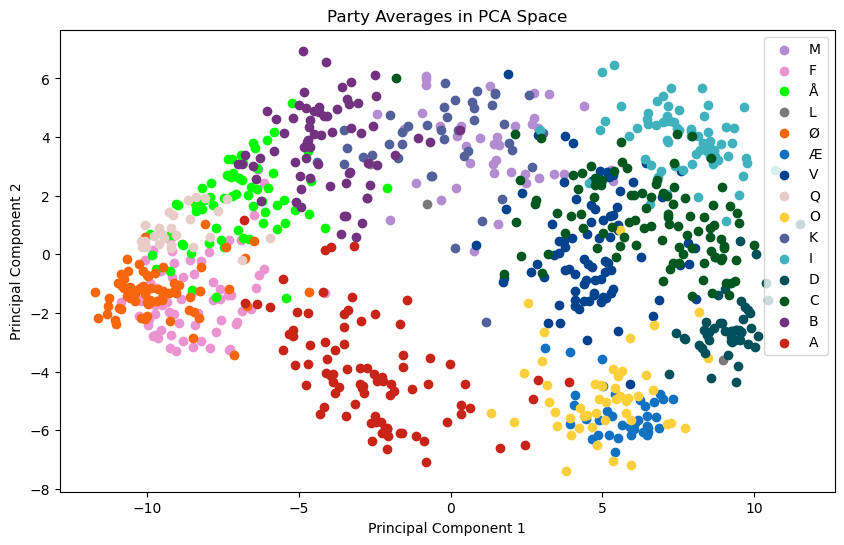

In [10]:
# Transform data into PCA space
pca_data = pca.transform(numeric_data)
pca_data = -pca_data # Flip the data to ensure that right-leaning parties are on the right

# Plot party averages along principal components
plt.figure(figsize=(10, 6))

for party in data['symbol'].unique():
    party_indices = data[data['symbol'] == party].index
    party_pca_data = pca_data[party_indices]
    party_color = listdf.loc[party]['farve']  # Get color for the party from listdf
    plt.scatter(party_pca_data[:, 0], party_pca_data[:, 1], label=party, color=party_color)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Party Averages in PCA Space')
plt.legend()
plt.show()

### Clustering

#### K-means

Siden at der er 11 partier i datasættet, forsøger vi at lave 11 clusters, vha. K-means. For at se hvordan clustersne bliver fordelt.

c:\Users\Sebastian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


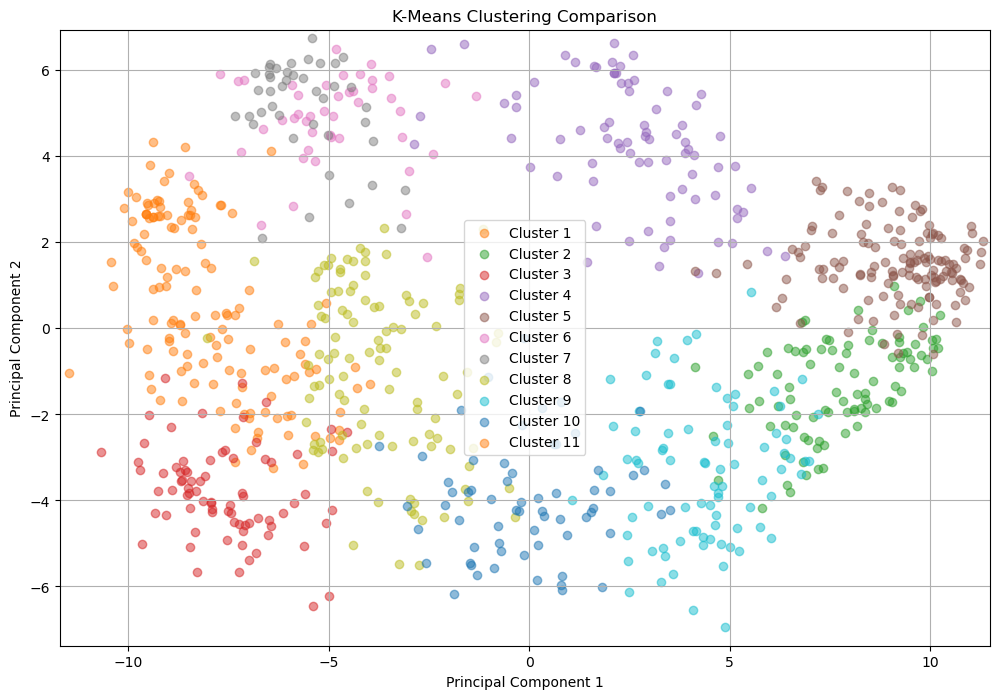

In [26]:
kmeans_full_data = KMeans(n_clusters=11, random_state=42)
kmeans_labels_full_data = kmeans_full_data.fit_predict(numeric_data)

# Plot PCA axes only
plt.figure(figsize=(12, 8))
plt.scatter(pca_data[:, 0], pca_data[:, 1], alpha=0) 
plt.xlim(pca_data[:, 0].min(), pca_data[:, 0].max())  
plt.ylim(pca_data[:, 1].min(), pca_data[:, 1].max())  

# Plot clusters from K-means on full data
for cluster in range(11):
    cluster_indices = numeric_data[kmeans_labels_full_data == cluster]
    cluster_pca = pca.transform(cluster_indices)
    plt.scatter(cluster_pca[:, 0], cluster_pca[:, 1], label=f'Cluster {cluster + 1}', alpha=0.5)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering Comparison')
plt.legend()
plt.grid(True)
plt.show()

For at finde ud af hvor mange partier der er nødvendigt for at repræsentere holdningerne, ud fra K-means clustering, kan vi lave et elbow-chart for at se hvornår det giver faldende afkast at tilføje flere partier.

c:\Users\Sebastian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Sebastian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Sebastian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Sebastian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memor

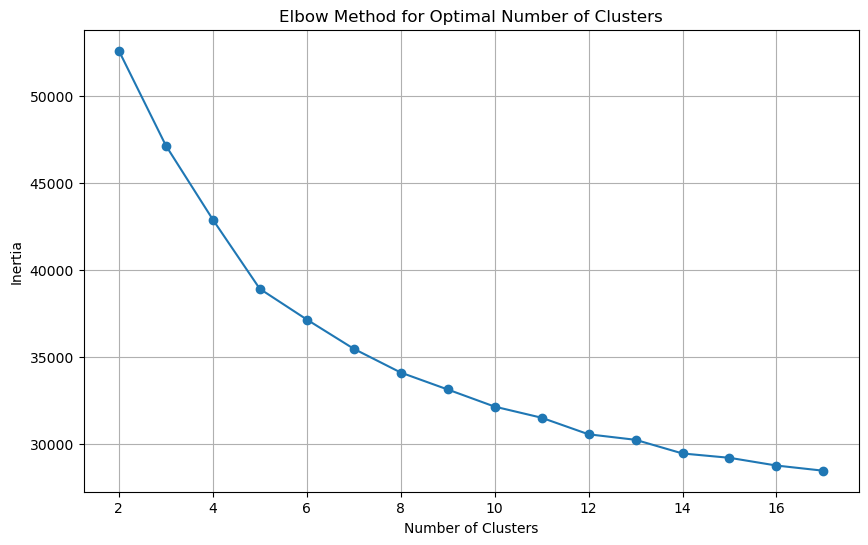

In [28]:
# Calculate inertia for different numbers of clusters
inertia = []
for n_clusters in range(2, 18):  # Trying different numbers of clusters from 2 to 18
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    kmeans.fit(numeric_data)
    inertia.append(kmeans.inertia_)

# Plotting the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(2, 18), inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()

Ud fra elbow-charten konkluderer vi at det giver mening at opdele dataen i 6 clusters.

Plot igen med 6 clusters

c:\Users\Sebastian\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


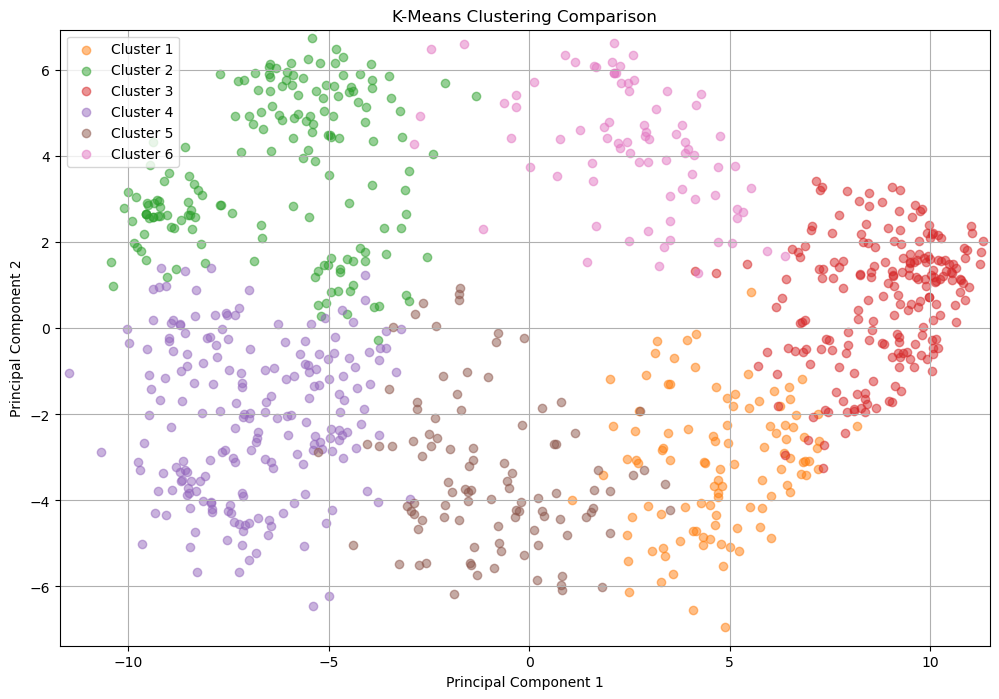

In [29]:
# Perform K-means clustering on the original data
kmeans_full_data = KMeans(n_clusters=6, random_state=42)
kmeans_labels_full_data = kmeans_full_data.fit_predict(numeric_data)

# Plot PCA axes only
plt.figure(figsize=(12, 8))
plt.scatter(pca_data[:, 0], pca_data[:, 1], alpha=0) 
plt.xlim(pca_data[:, 0].min(), pca_data[:, 0].max())  
plt.ylim(pca_data[:, 1].min(), pca_data[:, 1].max())  

# Plot clusters from K-means on full data
for cluster in range(6):
    cluster_indices = numeric_data[kmeans_labels_full_data == cluster]
    cluster_pca = pca.transform(cluster_indices)
    plt.scatter(cluster_pca[:, 0], cluster_pca[:, 1], label=f'Cluster {cluster + 1}', alpha=0.5)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering Comparison')
plt.legend()
plt.grid(True)
plt.show()

#### Agglomerative clustering

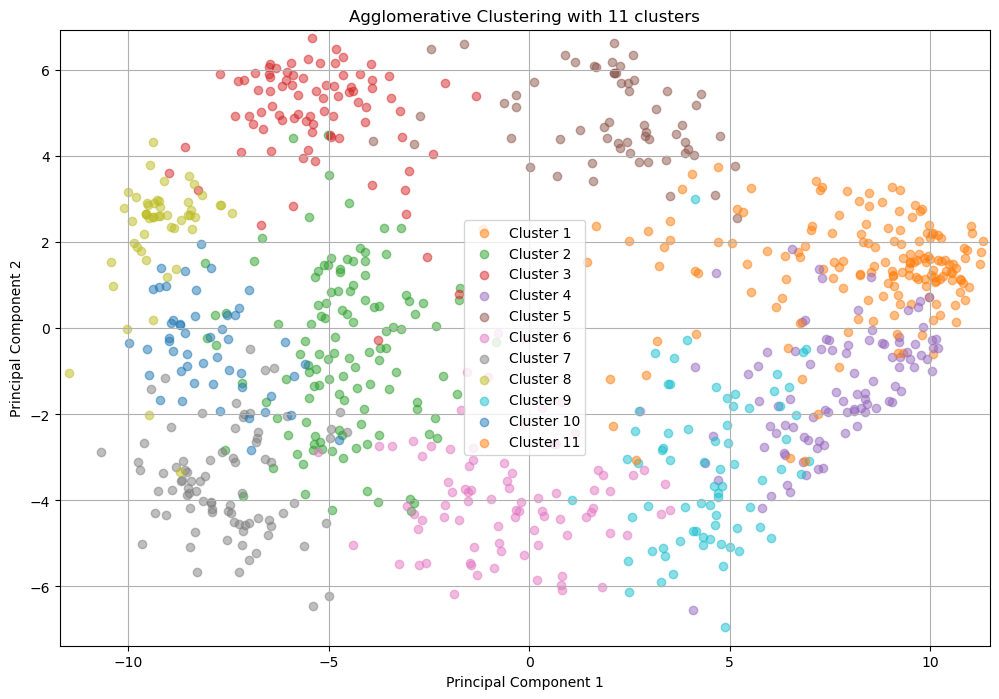

In [31]:
optimal_n_clusters = 11
agg_clustering = AgglomerativeClustering(n_clusters=optimal_n_clusters, linkage='ward')
clusters = agg_clustering.fit_predict(numeric_data)

# Plot PCA axes only
plt.figure(figsize=(12, 8))
plt.scatter(pca_data[:, 0], pca_data[:, 1], alpha=0)  
plt.xlim(pca_data[:, 0].min(), pca_data[:, 0].max())  
plt.ylim(pca_data[:, 1].min(), pca_data[:, 1].max())  

# Plot clusters from Agglomerative Clustering on PCA data
for cluster in range(optimal_n_clusters):
    cluster_indices = numeric_data[clusters == cluster]
    cluster_pca = pca.transform(cluster_indices)
    plt.scatter(cluster_pca[:, 0], cluster_pca[:, 1], label=f'Cluster {cluster + 1}', alpha=0.5)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'Agglomerative Clustering with {optimal_n_clusters} clusters')
plt.legend()
plt.grid(True)
plt.show()

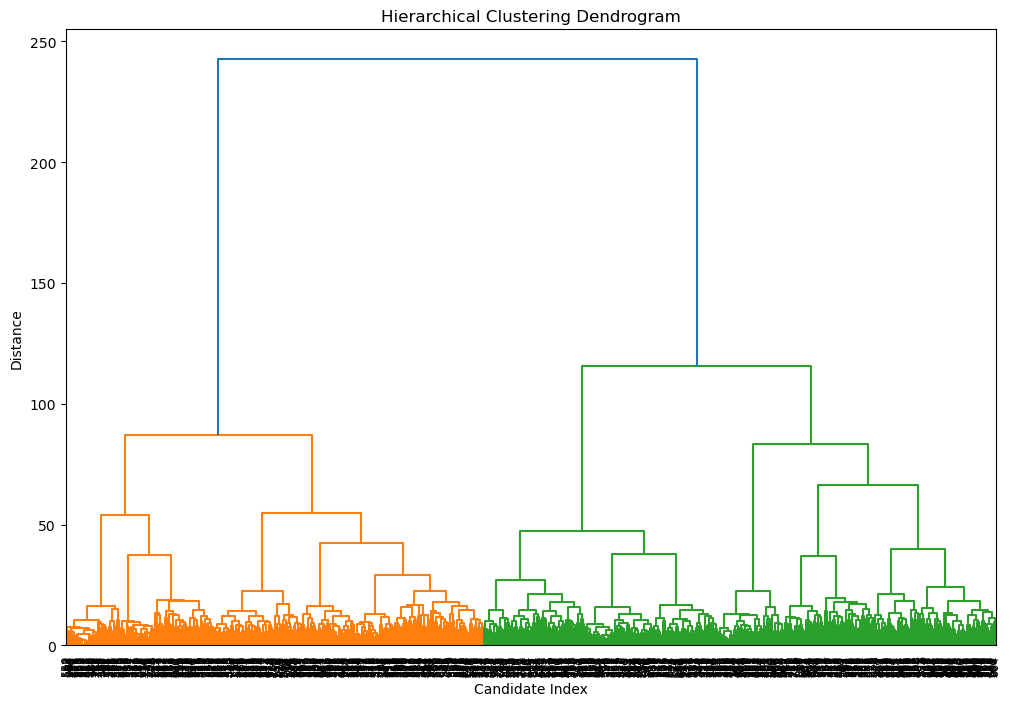

In [39]:
Z = linkage(numeric_data, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z, leaf_rotation=90, leaf_font_size=8)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Candidate Index')
plt.ylabel('Distance')
plt.show()

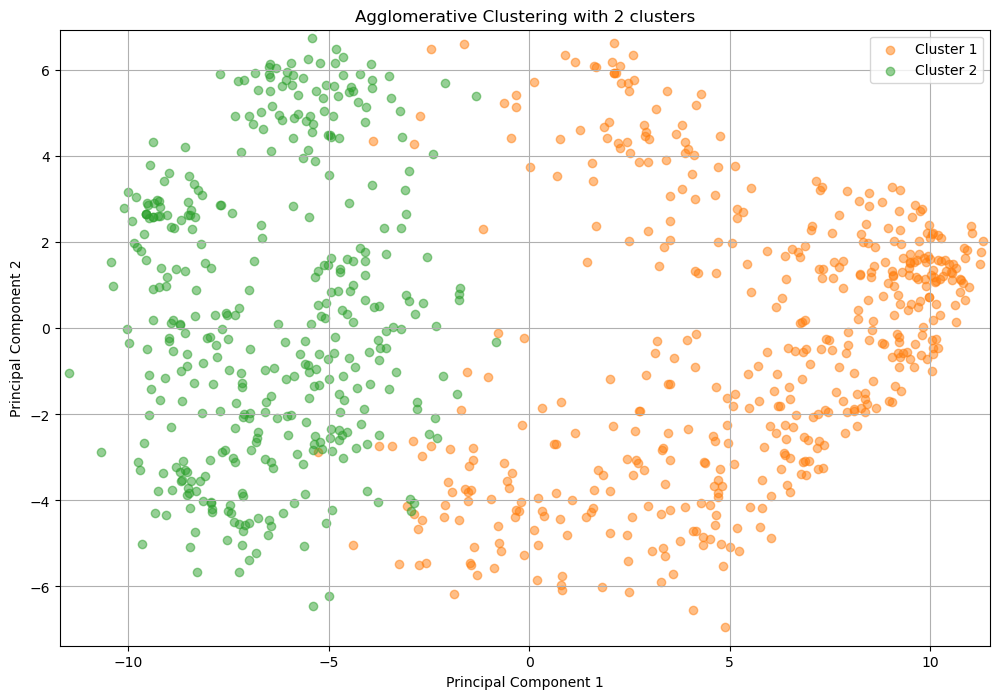

In [40]:
optimal_n_clusters = 2
agg_clustering = AgglomerativeClustering(n_clusters=optimal_n_clusters, linkage='ward')
clusters = agg_clustering.fit_predict(numeric_data)

plt.figure(figsize=(12, 8))
plt.scatter(pca_data[:, 0], pca_data[:, 1], alpha=0) 
plt.xlim(pca_data[:, 0].min(), pca_data[:, 0].max()) 
plt.ylim(pca_data[:, 1].min(), pca_data[:, 1].max())  

for cluster in range(optimal_n_clusters):
    cluster_indices = numeric_data[clusters == cluster]
    cluster_pca = pca.transform(cluster_indices)
    plt.scatter(cluster_pca[:, 0], cluster_pca[:, 1], label=f'Cluster {cluster + 1}', alpha=0.5)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'Agglomerative Clustering with {optimal_n_clusters} clusters')
plt.legend()
plt.grid(True)
plt.show()

#### DBSCAN

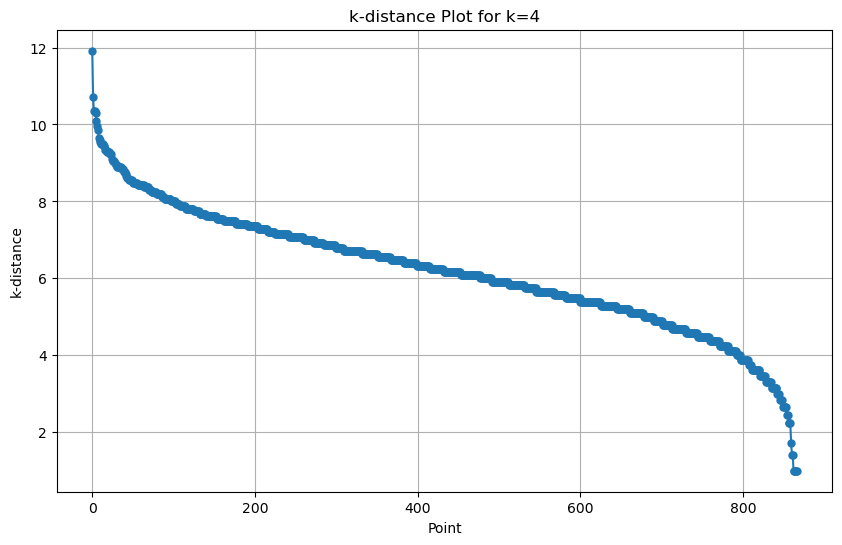

In [78]:
def calculate_k_distance(X, k):
    k_distance = []
    for i in range(len(X)):
        dist = []
        for j in range(len(X)):
            dist.append(np.linalg.norm(X.iloc[i, :] - X.iloc[j, :]))
        dist.sort()
        k_distance.append(dist[k])
    k_distance.sort(reverse=True)
    return k_distance

X = numeric_data
k = 4
k_distances = calculate_k_distance(X, k)

# Plot k-distance
plt.figure(figsize=(10, 6))
plt.plot(range(len(X)), k_distances, '.-', markersize=10)
plt.xlabel('Point')
plt.ylabel('k-distance')
plt.title(f'k-distance Plot for k={k}')
plt.grid(True)
plt.show()

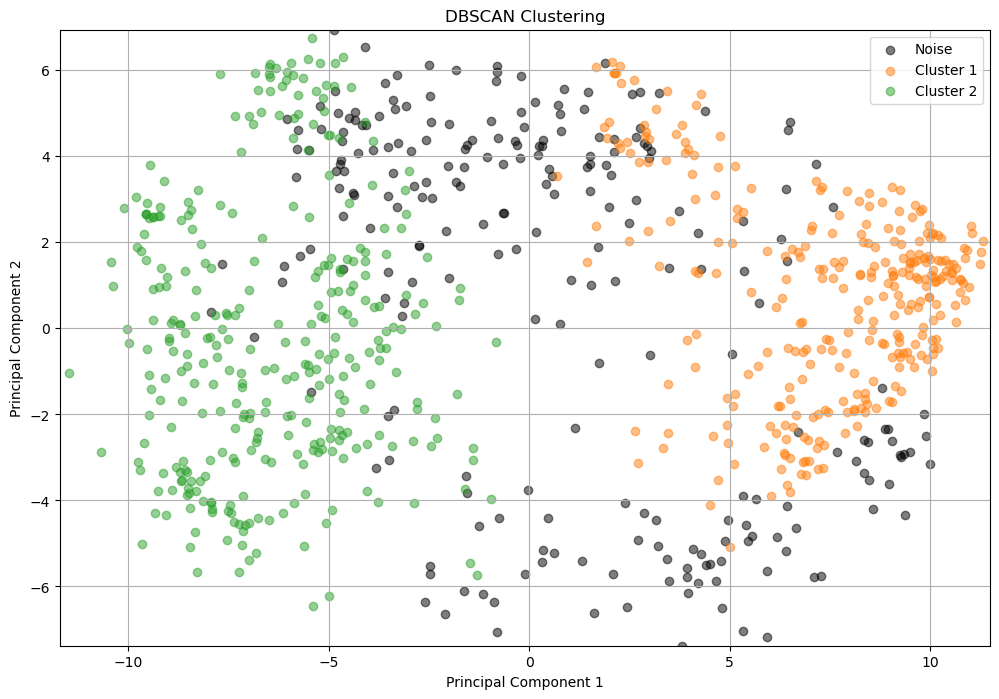

In [94]:
dbscan = DBSCAN(eps=8, min_samples=100)
dbscan_labels = dbscan.fit_predict(numeric_data)


plt.figure(figsize=(12, 8))
plt.scatter(pca_data[:, 0], pca_data[:, 1], alpha=0)

# Set limits for the PCA plot
plt.xlim(pca_data[:, 0].min(), pca_data[:, 0].max())
plt.ylim(pca_data[:, 1].min(), pca_data[:, 1].max())

# Overlay clusters from DBSCAN
for cluster in np.unique(dbscan_labels):
    if cluster == -1:
        noise_indices = dbscan_labels == cluster
        plt.scatter(pca_data[noise_indices, 0], pca_data[noise_indices, 1], color='black', label='Noise', alpha=0.5)
    else:
        cluster_indices = numeric_data[dbscan_labels == cluster]
        cluster_pca = pca.transform(cluster_indices)
        plt.scatter(cluster_pca[:, 0], cluster_pca[:, 1], label=f'Cluster {cluster + 1}', alpha=0.5)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering')
plt.legend()
plt.grid(True)
plt.show()

Efter en smule eksperimentering, kom vi frem til at en min_samples på 100, giver en god fordeling af clusters. Vi brugte 100 da det er mængden af dimensioner gange to. Det ender ud med 2 clusters, når vi bruger den epsilon værdi som vi observerede på k-distance plottet.

### Overview of the political landscape

#### Disagreements

c:\Users\Sebastian\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\Sebastian\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\Sebastian\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


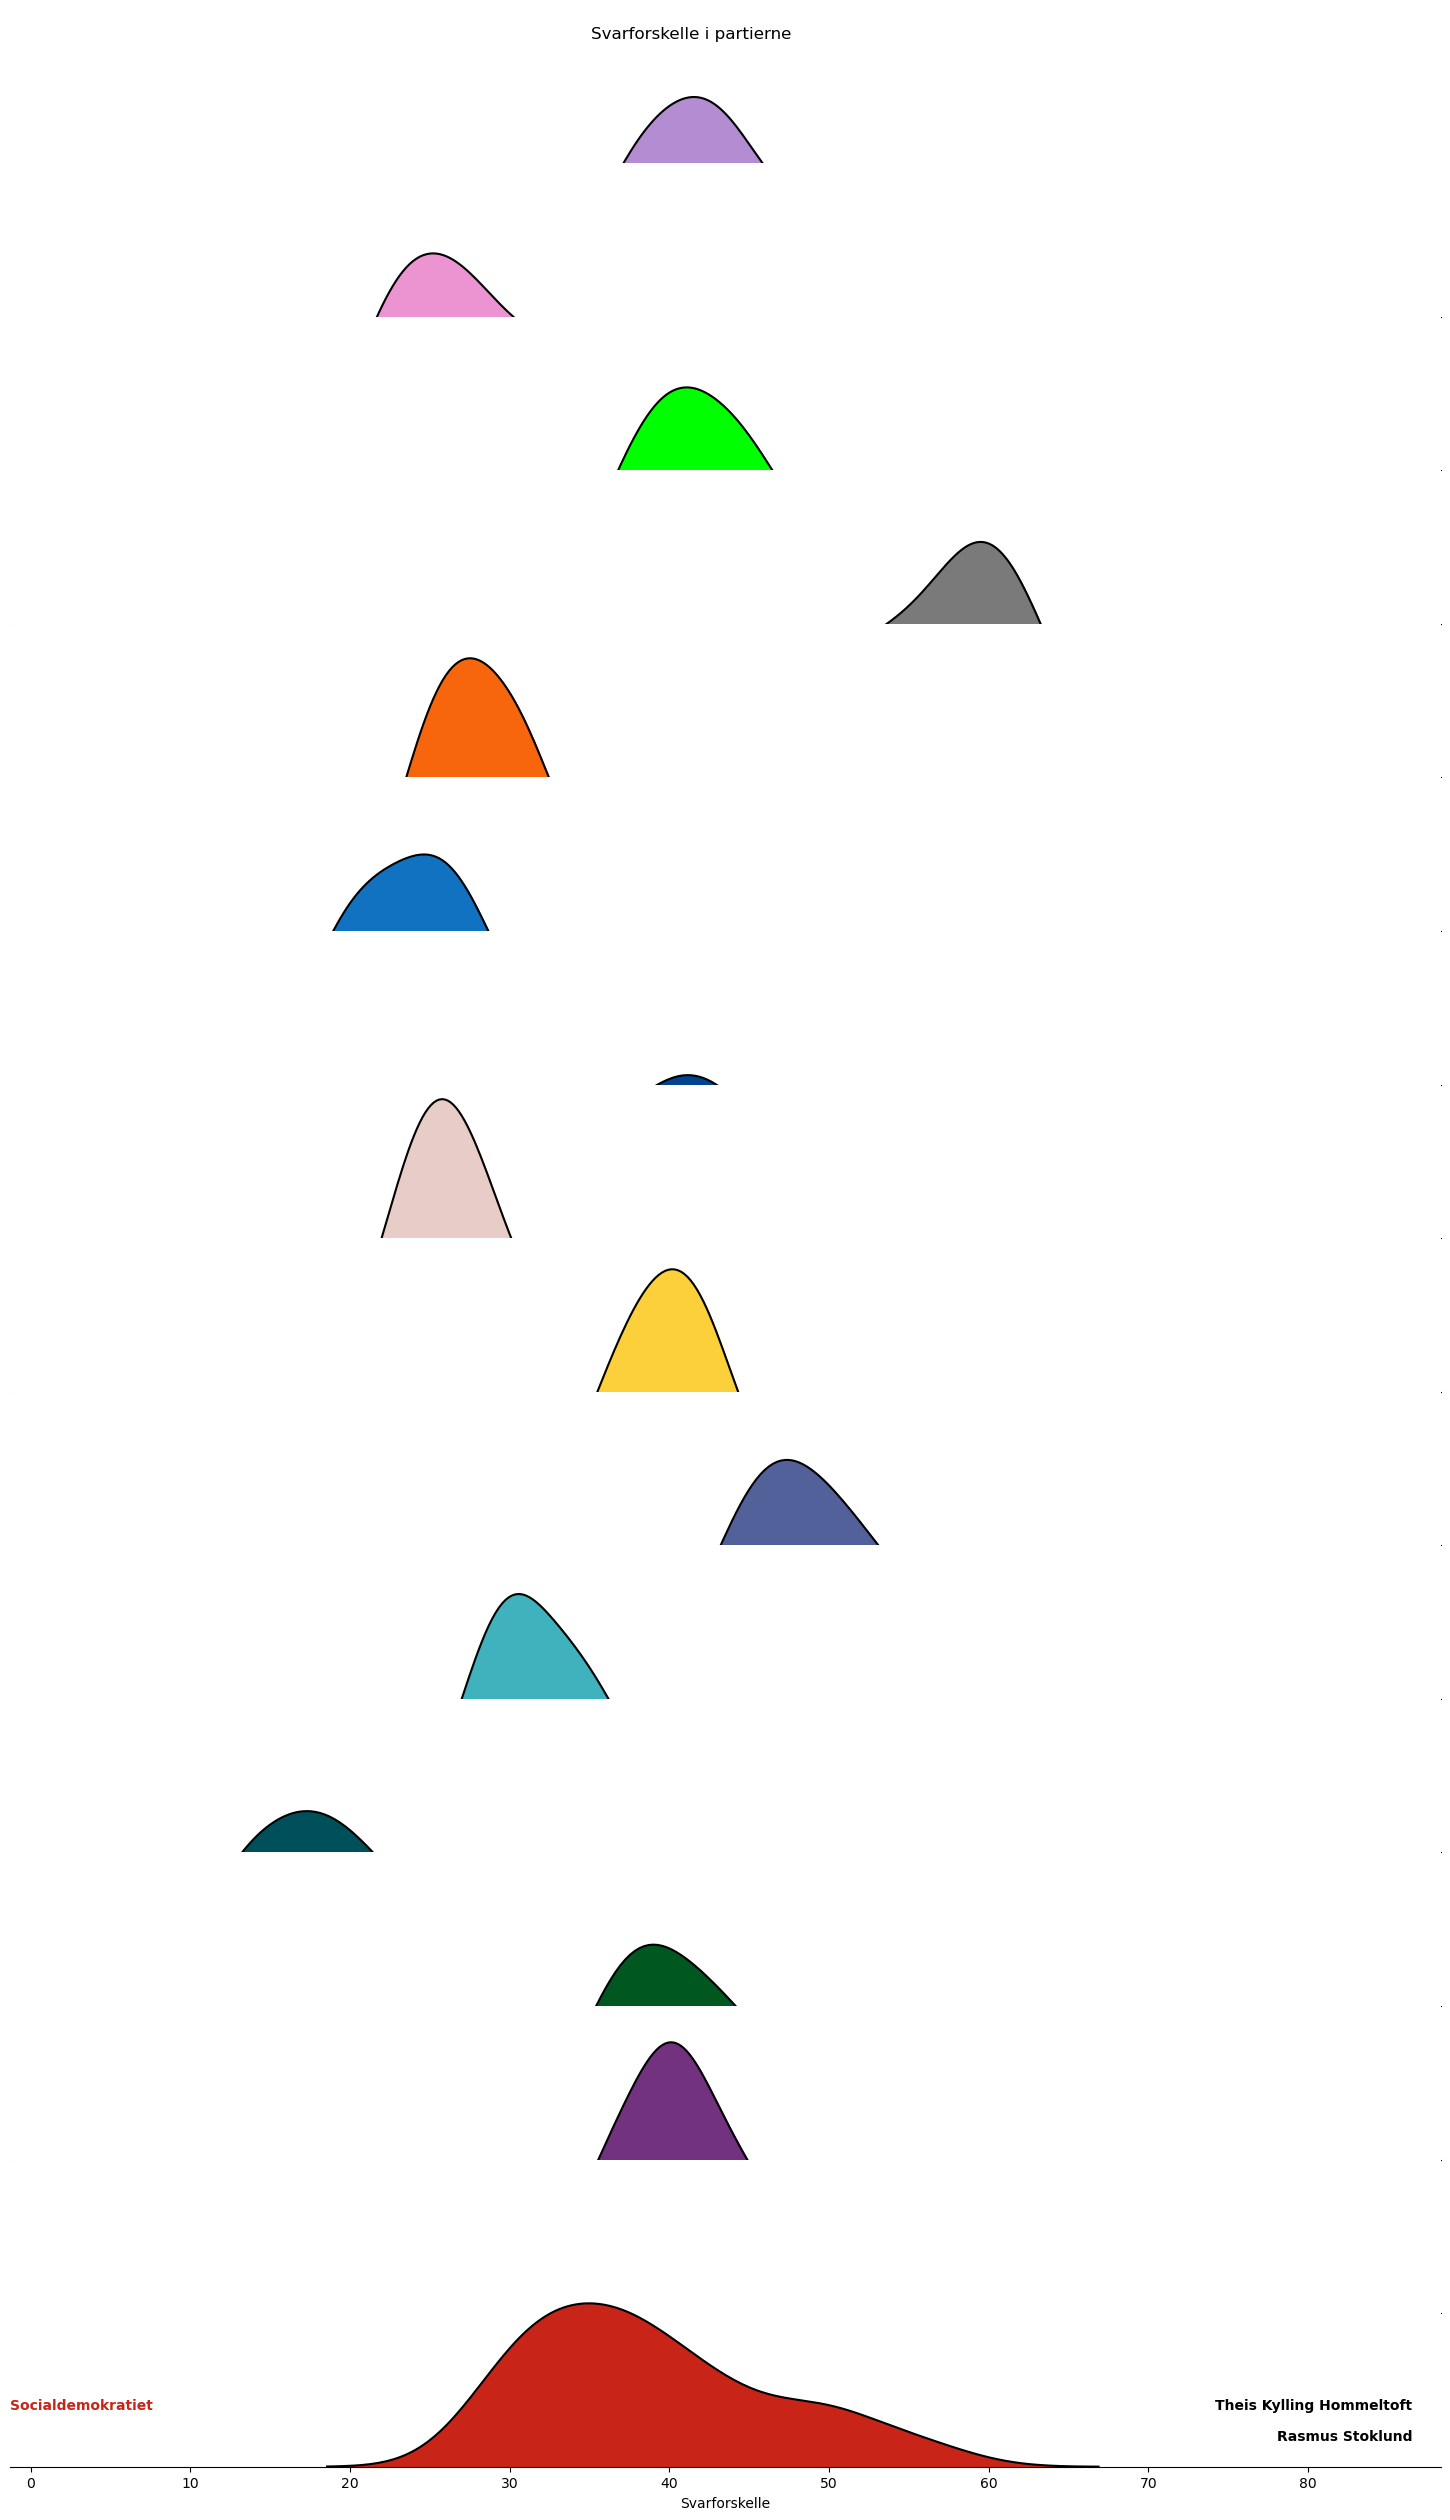

In [95]:
# make a dataframe for the answers of each candidate
candidates = data.copy()

def candidate_distance(candidate1, candidate2):
    distances = []
    for col in candidates.select_dtypes(include=[int]):
        distances.append(abs(candidate1[col] - candidate2[col]))
    return sum(distances)

def candidate_party_distance(candidate, party):
    party_candidates = candidates[candidates["symbol"] == party]
    distances = []
    for _, party_candidate in party_candidates.iterrows():
        distances.append(candidate_distance(candidate, party_candidate))
    return sum(distances) / len(distances)

parties = candidates.groupby("symbol")

candidates_with_party_distance = candidates.copy()
candidates_with_party_distance["party_distance"] = 0

for _, candidate in candidates.iterrows():
    party = candidate["symbol"]
    candidates_with_party_distance.loc[_, "party_distance"] = candidate_party_distance(candidate, party)

# Plot
color_map = dict(zip(listdf.index, listdf["farve"]))
g = sns.FacetGrid(candidates_with_party_distance, row="symbol", hue="symbol", height=1.7, aspect=9, palette=color_map)

g.map_dataframe(sns.kdeplot, x="party_distance", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="party_distance", color="black") # outline


def label(x, color, label):
    ax = plt.gca()
    party_name = listdf.loc[label]["shortname"]
    party_color = listdf.loc[label]["farve"]
    ax.text(0, 0.2, party_name, fontweight="bold", color=party_color,
            ha="left", va="center", transform=ax.transAxes)
    
    # add the names of the most and least distant candidates
    party_candidates = candidates_with_party_distance[candidates_with_party_distance["symbol"] == label]
    most_distant = party_candidates.loc[party_candidates["party_distance"].idxmax()]["navn"]
    least_distant = party_candidates.loc[party_candidates["party_distance"].idxmin()]["navn"]
    ax.text(0.98, 0.2, most_distant, fontweight="bold", color="black",
            ha="right", va="center", transform=ax.transAxes)
    ax.text(0.98, 0.1, least_distant, fontweight="bold", color="black", ha="right", va="center", transform=ax.transAxes)
                


g.map(label, "party_distance")
g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
g.set(yticks=[], xlabel="Svarforskelle", ylabel="")
g.despine(left=True)
plt.suptitle("Svarforskelle i partierne", y=0.98)
plt.show()

På plottet kan der ses et plot af de politiske partiers uenighedsgrad.

Desto højere desto mere uenighed er der i partiet.

Til højre for hvert parti er der 2 navne, det er de 2 personer i partiet der er mest uenige.

Nye Borgerlige er klart det mest enige parti. Og det mest uenige parti er Kristendemokraterne, pga. et par kandidater der ligger langt fra resten af partiet.

Ser man bort fra det så er det Løsgængerne der er mest uenige, hvilket ikke er overraskende da det ikke er et samlet parti.